<a href="https://colab.research.google.com/github/SAGODev17/COMPUTACI-N-BIOINSPIRADA/blob/main/Algoritmos_Geneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computación Bioinspirada**

#**Facultad de Ingenierías**

#**Ingeniería de Sistemas**










*Sergio Andrés García Ordoñez*

---




## **Librerías**
Importación de las bibliotecas y módulos esenciales para llevar a cabo operaciones numéricas y visualizaciones de datos. Incluye NumPy para cálculos numéricos, el módulo random para generar números aleatorios, math para funciones matemáticas estándar, y Matplotlib junto con su módulo mplot3d para la creación de gráficos y visualizaciones en 2D y 3D. Aunque este código en sí mismo no realiza ninguna tarea específica, prepara el entorno para futuras operaciones que involucran manipulación de datos y representación visual.

In [ ]:
import numpy as np; import random; import math; import matplotlib.pyplot as plt; from mpl_toolkits import mplot3d

##**Función Objetivo**
 $f(x) = f(x1, x2)=\prod_{i=1}^{n}( \sum_{j=1}^{5} \cos((j+1) \cdot (xi+j)))$

Se define la funcion, que calcula un valor numérico a partir de la entrada x. La función itera a través de los elementos de x, realiza cálculos trigonométricos para cada elemento y acumula los resultados en una variable llamada result. Se asegura de que x pueda ser una lista o un número escalar, y la salida final de la función es el producto acumulado de las sumas internas. En resumen, esta función f(x) realiza un cálculo complejo en función de la entrada x, con la capacidad de manejar tanto valores únicos como listas de números, y devuelve un único resultado numérico.

In [ ]:
# Definición de la función Objetivo
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función f
def f(x):
    result = 1.0
    if not isinstance(x, (list, np.ndarray)):
        x = [x]  # Si x es un valor único, lo convertimos en una lista
    for i in range(len(x)):
        inner_sum = 0.0
        for j in range(1, 6):
            inner_sum += np.cos((j + 1) * x[i] + j)
        result *= inner_sum

    return round(result, 5)

## **Gráfica de la Función**

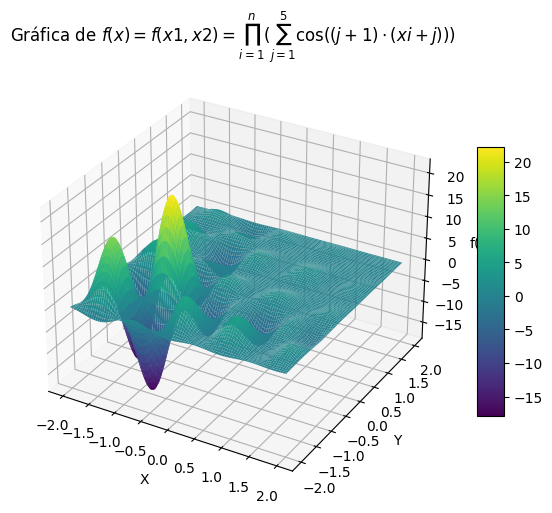

In [ ]:
# Crear un rango de valores para x en el intervalo [-2, 2]
x_range = np.linspace(-1.99, 1.99, 500)
y_range = np.linspace(-1.99, 1.99, 500)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

# Calcular los valores de Z utilizando la función f
for i in range(len(x_range)):
    for j in range(len(y_range)):
        Z[i, j] = f([X[i, j], Y[i, j]])



fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Cambiar el colormap y ajustar la iluminación
cmap = plt.get_cmap('viridis')
surf = ax.plot_surface(X, Y, Z, cmap=cmap, rstride=5, cstride=5)

# Etiquetas de los ejes y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x)')
plt.title('Gráfica 3D Detallada de f(x)')

# Añadir una barra de colores (legend) para la escala
fig.colorbar(surf, shrink=0.5, aspect=10)

# Aumentar la resolución
plt.savefig('grafica_detallada.png', dpi=300)
# Título de la gráfica
plt.title('Gráfica de $f(x) = f(x1, x2)=\prod_{i=1}^{n}( \sum_{j=1}^{5} \cos((j+1) \cdot (xi+j)))$')
plt.grid(True)
# Mostrar la gráfica
plt.show()




---



## **Implementación del Algoritmo Genético**

**"Los modelos de optimización son una de las grandes herramientas que usamos los científicos de datos para solucionar problemas: desde la solución de problemas de optimización a encontrar los hiperparámetros óptimos de un modelo." (Jauregui, 2022).**




### **Parametros de inicio**
**Aquí se definen algunos parámetros para tu algoritmo genético. Estás configurando el tamaño de la población en 100 individuos, el número de generaciones en 100 y la tasa de mutación en 0.1 (lo que significa que el 10% de los genes en un cromosoma sufrirán mutaciones).**

In [ ]:
# Parámetros del algoritmo genético
tamano_poblacion = 100
generaciones = 100
tasa_mutacion = 0.1

### **Población Inicial**
**Esta *función generar_individu*o genera un solo individuo (una solución potencial) con valores aleatorios dentro del rango [-1.99, 1.99].**

In [ ]:
# Definir la población inicial
def generar_individuo():
    valor = round(random.uniform(-19900, 19900) * 0.00001, 5)
    return valor

###**GENOTIPO**

**El genotipo se refiere a la representación interna de una solución potencial en el espacio de búsqueda. Esta representado por la variable individuo, que es un número decimal generado aleatoriamente dentro del rango [-1.99, 1.99]. Este valor numérico es la representación interna de una solución potencial para tu problema.**

In [ ]:
gen = generar_individuo()
print(gen)

-0.11663


### **FENOTIPO**

**El fenotipo se relaciona con el valor de la función objetivo f(x) cuando se evalúa con un valor específico del genotipo.**



**El fenotipo se calcula mediante la función f(x) para un valor particular del genotipo x. El resultado de f(x) es la característica observable o el valor asociado con esa solución específica. Por ejemplo, f(individuo) calcula el fenotipo asociado con el genotipo almacenado en la variable individuo.**

In [ ]:
fen = f(gen)
print(fen)

-1.54273


###**Cadena Genética**

***En este caso la cadena genética esta dada por tres valores esenciales, los cuales corresponden al valor del individuo que es el resultado de la funcion generar_individuo que retorna un valor aleatoreo entre [-1.99, 1.99], en el segundo caso, se obtiene el valor del fenotipo que es el resultado del valor del individuo en funcion de la funcion objetivo, por ultimo, el valor del genotipo***

In [ ]:
individuo =[ fen, gen]
print(individuo)

[-1.54273, -0.11663]


### **Generar Nueva Población**

**Se define una función llamada generar_poblacion(tamano_poblacion) que se encarga de crear una nueva población de individuos al recibir como argumento el tamaño deseado de la población (tamano_poblacion). La función utiliza una comprensión de lista para generar tamano_poblacion individuos llamando repetidamente a la función generar_individuo(), que previamente se definió para crear individuos con valores aleatorios. La función generar_poblacion() devuelve una lista que contiene la nueva población de individuos, cada uno de los cuales representa una posible solución al problema que se está abordando con el algoritmo genético. Esta población inicial servirá como punto de partida en el proceso de evolución del algoritmo genético para encontrar soluciones óptimas.**

In [ ]:
# Generar una nueva población
def generar_poblacion(tamano_poblacion):
    return  [generar_individuo() for _ in range(tamano_poblacion)]

### **Calcular Aptitud**
Se define una función llamada calcular_aptitud(individuo) que calcula la aptitud de un individuo en el contexto de un algoritmo genético orientado a minimizar una función objetivo f. La función de aptitud se calcula tomando el negativo del valor devuelto por la función f(individuo). Esta inversión de signo (-f(individuo)) se realiza para convertir el problema de minimización en un problema de maximización, ya que muchos algoritmos genéticos se diseñan para maximizar la aptitud. Al invertir el signo, el algoritmo genético buscará individuos con valores de f(individuo) más bajos, que representan soluciones más óptimas al problema original. Por lo tanto, esta función de aptitud transforma el objetivo de minimización en un problema de maximización adecuado para ser abordado por el algoritmo genético.

In [ ]:
# Función de aptitud para minimizar
def calcular_aptitud(individuo):
    return -f(individuo)# Negativo para minimizar

### **Calcular Padres**

**Se implementa una función llamada seleccionar_padres(poblacion, aptitudes) que se encarga de seleccionar a dos individuos como padres a partir de una población dada y sus correspondientes valores de aptitud. Primero, calcula el valor total de aptitudes sumando todos los valores en la lista de aptitudes. Luego, calcula las probabilidades de selección de cada individuo dividiendo su aptitud individual por el total de aptitudes. Estas probabilidades se almacenan en la lista probabilidad_seleccion. Finalmente, utiliza la función random.choices() para seleccionar dos padres de la población, teniendo en cuenta las probabilidades de selección calculadas. Esto implementa una selección aleatoria ponderada, donde los individuos con aptitudes más altas tienen una mayor probabilidad de ser seleccionados, pero aún existe una posibilidad para los individuos con aptitudes más bajas. Estos dos padres seleccionados se utilizarán posteriormente en el proceso de reproducción del algoritmo genético para crear una nueva generación de individuos.**

In [ ]:
# Funciones de selección Para este caso se calculan las aptitudes de cada individuo
# con el fin de definir una probabilidad de reproduccion, elegimos el metodo de seleccion aleatorea para la seleccion de los padres

def seleccionar_padres(poblacion, aptitudes):
    total_aptitudes = sum(aptitudes)
    probabilidad_seleccion = [aptitud / total_aptitudes for aptitud in aptitudes]
    padres = random.choices(poblacion, probabilidad_seleccion, k=2)
    return padres

### **Cruce**

**El punto de cruce se selecciona de manera aleatoria entre 0 y 1, y luego se combinan los genes de los padres de acuerdo con este punto de cruce para producir los hijos. Este proceso de cruce es esencial en los algoritmos genéticos, ya que permite la mezcla de información genética de los padres y la creación de nuevas soluciones potenciales en la siguiente generación. Los hijos generados serán parte de la población en la evolución del algoritmo, lo que contribuye a la exploración y explotación de soluciones en la búsqueda de soluciones óptimas para un problema dado.**

In [ ]:
# Función de cruce
def cruzar(padre1, padre2):
    punto_cruce = random.uniform(0, 1)
    hijo1 = padre1 * punto_cruce + padre2 * (1 - punto_cruce)
    hijo2 = padre2 * punto_cruce + padre1 * (1 - punto_cruce)
    return hijo1, hijo2

### **Mutación**

**En la operación de mutación, se verifica si un número aleatorio generado (con random.random()) es menor que la tasa_mutacion. Si es así, se realiza una mutación al reemplazar el individuo con un nuevo valor generado aleatoriamente utilizando la función generar_individuo() previamente definida. En caso contrario, el individuo permanece sin cambios. Esta función introduce variabilidad en la población al permitir que algunos individuos experimenten cambios aleatorios en sus genes con una probabilidad controlada por la tasa de mutación. La mutación es importante en los algoritmos genéticos, ya que puede ayudar a explorar nuevas soluciones y evitar que el algoritmo quede atrapado en óptimos locales.**

In [ ]:
# Función de mutación
def mutar(individuo, tasa_mutacion):
  return generar_individuo() if random.random() < tasa_mutacion else individuo

### **Inicializar Población**

**La población se almacena en la variable poblacion y se crea con un tamaño específico definido por la variable tamano_poblacion. Cada individuo en esta población se genera de manera aleatoria según las características establecidas en la función generar_individuo(), lo que significa que cada individuo tiene atributos aleatorios dentro de un rango determinado. Esta población inicial actúa como el punto de partida para el algoritmo genético y servirá como base para las generaciones futuras. El proceso de evolución del algoritmo, que incluye selección, cruce y mutación, operará en esta población inicial para buscar soluciones óptimas al problema definido.**

In [ ]:
# Inicializar nueva población
poblacion = generar_poblacion(tamano_poblacion)

### **Generaciónes**

**El ciclo se ejecuta durante un número de generaciones específico definido por la variable generaciones. En cada generación, se calcula la aptitud de cada individuo en la población actual utilizando la función calcular_aptitud(individuo), y los resultados se almacenan en una lista llamada aptitudes. La aptitud de un individuo representa cuán adecuado es en términos de la función objetivo que se está tratando de optimizar. Este proceso de evaluación de aptitud es fundamental para determinar qué individuos tienen un mejor desempeño en el contexto del problema que se está resolviendo. Una vez que se han calculado las aptitudes de todos los individuos en la población actual, se procede a la siguiente etapa del algoritmo genético, que generalmente implica la selección de padres, el cruce de individuos y la aplicación de mutaciones para crear una nueva generación de individuos.**

In [ ]:
# Ciclo de generaciones
for generacion in range(generaciones):
    aptitudes = [calcular_aptitud(individuo) for individuo in poblacion]

### **Fitness**

**Para lograrlo, se determina el índice del mejor individuo en la población al encontrar el valor máximo en la lista de aptitudes y luego se almacena este individuo y su aptitud. Esta información es crucial para evaluar el progreso del algoritmo, identificar si se ha alcanzado una solución óptima y, en general, para monitorear el desempeño del algoritmo a lo largo de las generaciones, lo que puede guiar decisiones posteriores en la optimización o finalización del proceso.**

In [ ]:
    # Encontrar el mejor individuo de esta generación
    mejor_individuo = poblacion[aptitudes.index(min(aptitudes))]
    mejor_aptitud = min(aptitudes)

### **Selección y Reproducción**

**Este bloque de código representa el núcleo de un algoritmo genético, donde se seleccionan y crean los individuos para la siguiente generación. En cada ciclo de generación, se seleccionan parejas de padres en función de su aptitud, se cruzan para crear dos hijos, y luego se aplica una posible mutación a estos hijos. El número total de hijos generados en cada generación es igual al tamaño de la población, y estos hijos se convierten en la nueva población. Este proceso se repite durante un número específico de generaciones, lo que permite que la población evolucione y busque soluciones más óptimas para el problema que se está abordando. La selección, el cruce y la mutación son los mecanismos clave que imitan la evolución natural y conducen a la mejora gradual de los individuos en la población en busca de soluciones más adecuadas.**

In [ ]:
    # Seleccionar y crear la siguiente generación
    nueva_poblacion = []
    for _ in range(tamano_poblacion // 2):
        padre1, padre2 = seleccionar_padres(poblacion, aptitudes)
        hijo1, hijo2 = cruzar(padre1, padre2)
        hijo1 = mutar(hijo1, tasa_mutacion)
        hijo2 = mutar(hijo2, tasa_mutacion)
        nueva_poblacion.extend([hijo1, hijo2])
    poblacion = nueva_poblacion

**La lista mejores_individuos almacenará los mejores individuos encontrados en cada generación, mientras que mejores_valores guardará sus valores de aptitud asociados.**

In [ ]:
# Inicializa una lista para almacenar los mejores y los peores individuos con sus valores de aptitud en cada generación
mejores_individuos = []
mejores_valores = []

### **Ciclo de generaciones y seguimiento del mejor individuo**

**El objetivo de este ciclo es llevar a cabo varias generaciones de un proceso de optimización y rastrear el mejor individuo en cada generación.**

In [ ]:
# Ciclo de generaciones
for generacion in range(generaciones):
    aptitudes = [calcular_aptitud(individuo) for individuo in poblacion]



    # Encontrar el mejor individuo de esta generación
    mejor_individuo = poblacion[aptitudes.index(max(aptitudes))]
    mejor_valor = f(mejor_individuo)


    # Guardar el mejor individuo y su valor de aptitud
    mejores_individuos.append(mejor_individuo)
    mejores_valores.append(mejor_valor)
    print(f"Generación {generacion}: Mejor individuo = {individuo}, Valor = {mejor_valor}")

Generación 0: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 1: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 2: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 3: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 4: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 5: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 6: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 7: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 8: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 9: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 10: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 11: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 12: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 13: Mejor individuo = [-1.54273, -0.11663], Valor = -1.5431
Generación 14: M

#### **Gráfica de individuos en población**

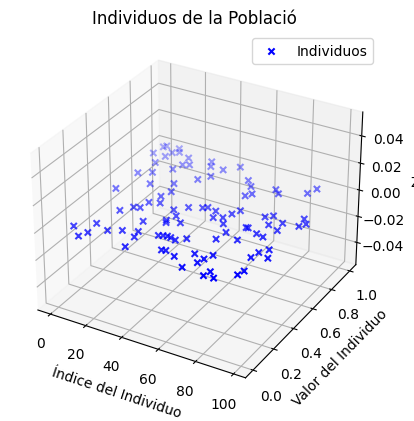

In [ ]:

indice_individuos = np.arange(tamano_poblacion)
valores_individuos = np.random.rand(tamano_poblacion)

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico de dispersión 3D
ax.scatter(indice_individuos, valores_individuos, np.zeros_like(indice_individuos), marker='x', color='b', label='Individuos')

# Etiquetas de los ejes
ax.set_xlabel('Índice del Individuo')
ax.set_ylabel('Valor del Individuo')
ax.set_zlabel('Z')  # Eje Z agregado para la visualización 3D

# Título y leyenda
ax.set_title('Individuos de la Població')
ax.legend()

# Mostrar el gráfico 3D
plt.show()

### **Gráfica del mejor individuo en la función Objetivo**

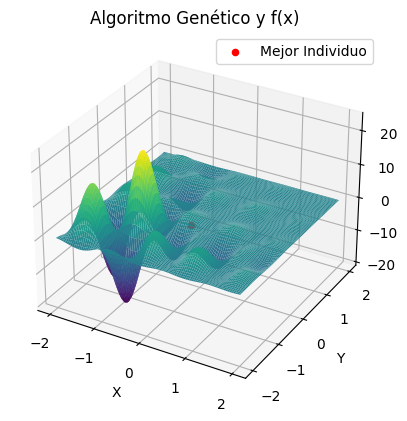

Generación 99: Mejor individuo = -0.11988998762703156, Valor = -1.5431


In [ ]:
# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', rstride=5, cstride=5)
ax.scatter(mejor_individuo, mejor_individuo, mejor_valor, marker='o', color='r', label='Mejor Individuo')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('z')

# Título y leyenda
ax.set_title('Algoritmo Genético y f(x)')
ax.legend()
# Mostrar el gráfico 3D
plt.show()
print(f"Generación {generacion}: Mejor individuo = {mejor_individuo}, Valor = {mejor_valor}")


## **Conclusiones**

**El algoritmo genético comienza con una población inicial de individuos generados aleatoriamente y luego evoluciona a lo largo de múltiples generaciones mediante la aplicación de operadores genéticos, como selección, cruce y mutación. El objetivo del algoritmo es encontrar soluciones óptimas para un problema específico, y lo hace evaluando la aptitud de cada individuo en función de una función objetivo proporcionada. El mejor individuo de cada generación se registra, y el algoritmo sigue ejecutándose durante un número determinado de generaciones. A lo largo del proceso, se busca mejorar progresivamente la calidad de la población y, finalmente, se encuentra el individuo con la aptitud máxima como solución al problema. El código también realiza un seguimiento de los mejores y peores individuos en cada generación, lo que permite evaluar la convergencia del algoritmo y su rendimiento. En general, este código proporciona una estructura básica para implementar y ejecutar un algoritmo genético en la resolución de problemas de optimización.**

## **Referencias**

*Jauregui, A. F. (2022, June 21). Algoritmo Genético en Python desde 0. Ander Fernández. https://anderfernandez.com/blog/algoritmo-genetico-en-python/*